In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as p

In [52]:
### Loading the Data 

Z = p.load(open('data/R8_8pc_metal.0350.scal0.p'))

In [53]:
### Setting up bounds for X and Y along the grid

Zxy_data = Z['z']["data"]
Zxy_bounds = Z['z']["bounds"]
Nx,Ny = Zxy_data.shape

In [54]:
print Zxy_bounds

[-512.  512. -512.  512.]


In [55]:
### Defining the length and width of the plot

Lx = Zxy_bounds[1] - Zxy_bounds[0]
Ly = Zxy_bounds[3] - Zxy_bounds[2]

In [56]:
### Defining the left corner of the plot

Xmin = Zxy_bounds[0]
Ymin = Zxy_bounds[2]

In [57]:
### Creating a range for the indices

i_index = np.arange(Nx)
j_index = np.arange(Ny)

In [58]:
### Finding the difference between each "Zone"

dx = Lx/Nx
dy = Ly/Ny

In [59]:
### Creating indices for X and Y

Xi = i_index * dx + Xmin + dx/2
Yj = j_index * dy + Ymin + dy/2

In [60]:
print Yj

[-508. -500. -492. -484. -476. -468. -460. -452. -444. -436. -428. -420.
 -412. -404. -396. -388. -380. -372. -364. -356. -348. -340. -332. -324.
 -316. -308. -300. -292. -284. -276. -268. -260. -252. -244. -236. -228.
 -220. -212. -204. -196. -188. -180. -172. -164. -156. -148. -140. -132.
 -124. -116. -108. -100.  -92.  -84.  -76.  -68.  -60.  -52.  -44.  -36.
  -28.  -20.  -12.   -4.    4.   12.   20.   28.   36.   44.   52.   60.
   68.   76.   84.   92.  100.  108.  116.  124.  132.  140.  148.  156.
  164.  172.  180.  188.  196.  204.  212.  220.  228.  236.  244.  252.
  260.  268.  276.  284.  292.  300.  308.  316.  324.  332.  340.  348.
  356.  364.  372.  380.  388.  396.  404.  412.  420.  428.  436.  444.
  452.  460.  468.  476.  484.  492.  500.  508.]


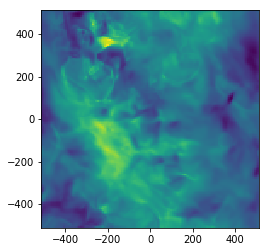

In [61]:
### Plotting the metal injection plot

plt.imshow(Zxy_data, extent=Zxy_bounds, origin='lower')

In [63]:
### Setting the max angle and max radius

Nr = 50
rMax = Lx/2

In [64]:
### Create an array to span the radii values

dr = rMax / Nr
rindex = np.arange(Nr)
r = rindex * dr 

In [65]:
### Creating an array to store the Two-point correlation function data

def TwoPointFuct(Data,rArray,NumAngle,dx,dy):
    TwoPoint = []
    Zmean=Data.mean()
    Zvar=Data.var()
    angleMax = 2 * np.pi
    dangle = angleMax/NumAngle
    angleindex = np.arange(NumAngle)
    angle = angleindex * dangle
    Nx,Ny = Data.shape
    i_index = np.arange(Nx)
    j_index = np.arange(Ny)
    Nr, = rArray.shape
    for rad in rArray:
        for ang in angle:
            dxi = (rad * np.cos(ang))
            dyj = (rad * np.sin(ang))
            di = dxi / dx
            dj = dyj / dy
            sum = 0
            for i in i_index:
                for j in j_index:
                    i2=(i+int(round(di)))%Nx
                    j2=(j+int(round(dj)))%Ny
                    sum += Data[i,j] * Data[i2,j2]
            TwoPoint.append(sum/(Nx * Ny))
    tp_2d=(np.array(TwoPoint).reshape(Nr,NumAngle)-Zmean**2)/Zvar
    return tp_2d

In [66]:
Nr,=r.shape
print Nr

50


In [67]:
### Changing the TwoPoint list to an array

tp_2d = TwoPointFuct(Zxy_data,r,1,dx,dy)

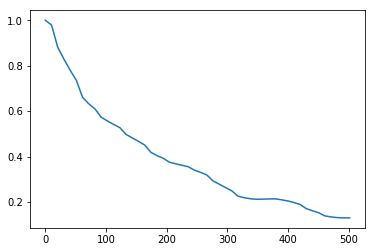

In [68]:
### Creating the plot

plt.plot(r,tp_2d.mean(axis=1))

In [69]:
tp_2d2 = TwoPointFuct(Zxy_data,r,50,dx,dy)

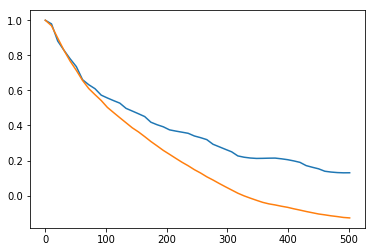

In [70]:
plt.plot(r,tp_2d.mean(axis=1))
plt.plot(r,tp_2d2.mean(axis=1))

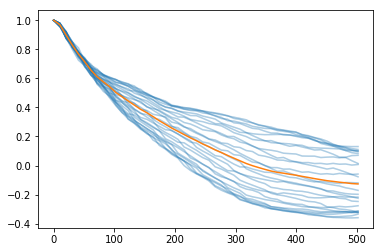

In [71]:
plt.plot(r,tp_2d2,'C0',alpha=0.2);
plt.plot(r,tp_2d2.mean(axis=1),color='C1')

In [72]:
tp_2d2.mean(axis=1)

array([ 1.        ,  0.96861998,  0.89843428,  0.82888166,  0.76694566,
        0.71395954,  0.65656783,  0.61038989,  0.57587429,  0.54256689,
        0.50302735,  0.47346692,  0.44425521,  0.41557546,  0.38683051,
        0.36341016,  0.33658776,  0.30868129,  0.28359668,  0.25789921,
        0.23562433,  0.21289141,  0.19060967,  0.17050596,  0.14812169,
        0.12910151,  0.10747961,  0.0891137 ,  0.06943903,  0.05054563,
        0.03223844,  0.01392245, -0.00123521, -0.01419949, -0.02650492,
       -0.03825067, -0.04688641, -0.0529532 , -0.06024186, -0.06655323,
       -0.0749236 , -0.08237129, -0.0903423 , -0.09744976, -0.10458802,
       -0.1094702 , -0.11496115, -0.11928198, -0.12434632, -0.1269683 ])